
References: 
1. http://ipywidgets.readthedocs.io/en/latest/examples/Lorenz%20Differential%20Equations.html
2. https://github.com/mspieg/dynamical-systems/blob/master/LorenzEquations.ipynb
3. https://en.wikipedia.org/wiki/List_of_dynamical_systems_and_differential_equations_topics
4. http://ipython-books.github.io/chapter-12-deterministic-dynamical-systems/
http://ipython-books.github.io/
5. http://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/
6. http://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/
7. http://colah.github.io/posts/2015-08-Understanding-LSTMs/
8. http://www.iro.umontreal.ca/~lisa/pointeurs/RazvanPascanuThesis.pdf (also in downloads)
9. https://www.gribblelab.org/compneuro/2_Modelling_Dynamical_Systems.html#orgheadline5 
10. https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f
11. https://github.com/yuqirose/trnn poster - http://roseyu.com/Materials/nips17-tsw-poster.pdf
12. https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/

In [53]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [54]:

import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation


In [55]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM, SimpleRNN
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

## Generate Time Series using the Lorenz System of DE

In [68]:

def solve_lorenz_graph(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8.0/3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('on')
    SEQUENCE_SIZE = 100         # length of the sequence to generate
    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    # Label the axes
    ax.set_title('The Lorenz Attractor')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
       # print(x, y, z) #print the data
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

In [69]:
def solve_lorenz(N=10, max_time=4.0, sigma=10.0, beta=8.0/3, rho=28.0):
    
    #define ODE function we need to solve
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose N random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    # First generate a list of time steps starting a zero and going to max_time. 250 steps for each time unit
    t = np.linspace(0, max_time, int(250*max_time))
    # Second integrate the ODE using the lorenz_deriv funtion above for each random starting point
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    return t, x_t

In [70]:
sigma=10.0
beta=8.0/3
rho=28.0
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    """Compute the time-derivative of a Lorenz system."""
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


In [71]:
#print (t)

In [72]:

N=5
max_time = 4.0
#original code generated an array of starting points
x0 = -15 + 30 * np.random.random((N, 3))
print (x0)
# generate one random starting point at a time
point1 = np.random.random(3)
print ("Random point1 = ",point1)

sigma = 10.0
beta = 8.0/3
rho = 28.0

# Solve for the trajectories
# First generate a list of time steps starting a zero and going to max_time. 250 steps for each time unit
t = np.linspace(0, max_time, int(250*max_time))
print ("shape of t = ", t.shape)
#print (" t = " , t)

# Second integrate the ODE using the lorenz_deriv funtion above
#lor1 = integrate.odeint(lorenz_deriv, point1, t, sigma, beta, rho)
lor1 = integrate.odeint(lorenz_deriv, point1, t)
print (" lor1 = ", lor1)
print ("shape of lor1 = ", lor1.shape)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point2 = -15 + 30 * np.random.random(3)
lor2 = integrate.odeint(lorenz_deriv, point2, t)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point3 = -15 + 30 * np.random.random(3)
lor3 = integrate.odeint(lorenz_deriv, point3, t)

#x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
#                   for x0i in x0])

[[-12.04959499  -2.36677125  13.7366859 ]
 [  0.99495855   5.75631342  -5.53453107]
 [  5.59502783  10.03877016 -14.45135168]
 [  7.50432945  14.66583267   7.44496963]
 [ -6.58668024   8.67837985 -11.9032198 ]]
Random point1 =  [0.44789353 0.9085955  0.29361415]
shape of t =  (1000,)
 lor1 =  [[  0.44789353   0.9085955    0.29361415]
 [  0.46689787   0.95559685   0.29219358]
 [  0.48703984   1.00457977   0.2909519 ]
 ...
 [ -9.5315395  -10.59735213  26.92235934]
 [ -9.57331751 -10.59390224  27.03955592]
 [ -9.61323517 -10.5861339   27.15701749]]
shape of lor1 =  (1000, 3)


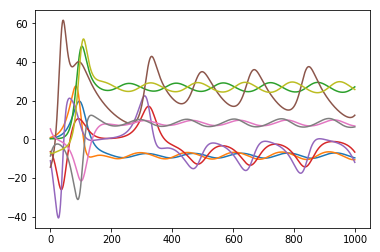

In [73]:
# from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(lor1)
plt.plot(lor2)
plt.plot(lor3)

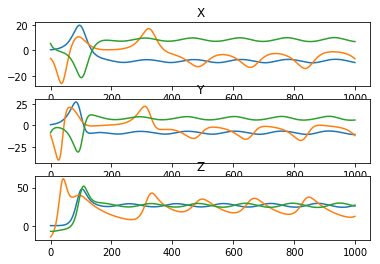

In [74]:

plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(lor1[:,0:1] )
plt.plot(lor2[:,0:1] )
plt.plot(lor3[:,0:1] )
#plt.show()

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(lor1[:,1:2] )
plt.plot(lor2[:,1:2] )
plt.plot(lor3[:,1:2] )
#plt.show()

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(lor1[:,2:3] )
plt.plot(lor2[:,2:3] )
plt.plot(lor3[:,2:3] )
plt.show()

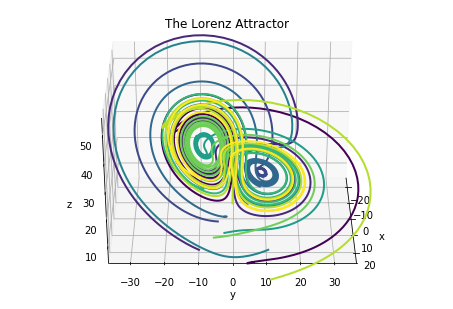

In [75]:
t, x_t = solve_lorenz_graph(angle=0, N=10) #angle initially at 0, butterfly at 134

In [76]:

widget = interactive(solve_lorenz_graph, angle=(0.,360.), max_time=(0.1, 10.0),
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(widget)

A Jupyter Widget

In [65]:
#t, x_t = widget.result

In [66]:
t, x_t = solve_lorenz(N=10) #try 10 random starting point initially, chnage to 100 later

In [67]:
print ("lorenz output shape : " , x_t.shape)

lorenz output shape :  (10, 1000, 3)


In [16]:
print ("lorenz output : " , x_t)

lorenz output :  [[[-2.48933986e+00  6.60973480e+00 -1.49965688e+01]
  [-2.14077645e+00  6.18646806e+00 -1.48962127e+01]
  [-1.82130748e+00  5.82299967e+00 -1.47853208e+01]
  ...
  [ 6.87667416e+00  1.07734499e+01  1.78286316e+01]
  [ 7.03431517e+00  1.10115546e+01  1.79410297e+01]
  [ 7.19515729e+00  1.12517722e+01  1.80659207e+01]]

 [[-5.93002282e+00 -1.05973233e+01 -1.22298422e+01]
  [-6.13136261e+00 -1.15193465e+01 -1.18344052e+01]
  [-6.36138540e+00 -1.24619735e+01 -1.14104771e+01]
  ...
  [-1.11085203e+01 -1.62261151e+01  2.32341935e+01]
  [-1.13121656e+01 -1.63640151e+01  2.37150767e+01]
  [-1.15128567e+01 -1.64827701e+01  2.42098140e+01]]

 [[-9.41219366e+00 -4.63317819e+00 -3.09697577e+00]
  [-9.24717733e+00 -5.76936651e+00 -2.87083263e+00]
  [-9.13260659e+00 -6.87477643e+00 -2.60897637e+00]
  ...
  [ 8.94933599e+00  1.00204877e+01  2.61339939e+01]
  [ 8.99188828e+00  1.00458891e+01  2.62149083e+01]
  [ 9.03371359e+00  1.00685518e+01  2.62975123e+01]]

 ...

 [[ 1.40478473e+0

## Convert data into format for Keras

In [17]:
# split into train and test sets
train_size = int(len(x_t)* 0.70)
print(train_size)
test_size = len(x_t) - train_size
lorenz_train = x_t[0:train_size]
lorenz_test  = x_t[train_size:len(x_t)]
print ("train shape : " , lorenz_train.shape)
print ("test shape : " , lorenz_test.shape)

7
train shape :  (7, 1000, 3)
test shape :  (3, 1000, 3)


In [18]:

def to_sequences(seq_size, obs): 
    x = []
    y = []
    for i in range(len(obs)-SEQUENCE_SIZE-1):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [x for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
    return np.array(x),np.array(y)

In [19]:
def to_sequences_ray(seq_size, obs): 
    #x = []
    #y = []
    x, y = to_sequences(SEQUENCE_SIZE,obs[0])
    for i in range(len(obs)):
        xtemp, ytemp = to_sequences(SEQUENCE_SIZE,obs[i])
        x = np.concatenate((x, xtemp), axis=0)
        y = np.concatenate((y, ytemp), axis=0)
        #x.append(xtemp)
        #y.append(ytemp)
    return np.array(x),np.array(y)

In [20]:
data_segment = lorenz_train[1]
print("training data segment shape ", lorenz_train[0].shape)
print("training data segment ", lorenz_train[1])

training data segment shape  (1000, 3)
training data segment  [[ -5.93002282 -10.59732328 -12.22984216]
 [ -6.13136261 -11.51934646 -11.83440517]
 [ -6.3613854  -12.4619735  -11.41047706]
 ...
 [-11.10852032 -16.22611514  23.23419346]
 [-11.31216558 -16.36401507  23.71507674]
 [-11.51285672 -16.48277012  24.20981403]]


In [21]:

#train = np.apply_along_axis(to_sequences_ray, 1, lorenz_train)
print (lorenz_train.shape)
print (lorenz_test.shape)
print (len(lorenz_train))

(7, 1000, 3)
(3, 1000, 3)
7


In [22]:
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences_ray(SEQUENCE_SIZE,lorenz_train)
#print(lorenz_train)
x_test,y_test = to_sequences_ray(SEQUENCE_SIZE,lorenz_test)
print("Shape of training input: ", x_train.shape)
print("Shape of test input: ", x_test.shape)
print ("Shape of training output: " , y_train.shape)
print ("Shape of testing output: " , y_test.shape)

Shape of training input:  (7912, 10, 3)
Shape of test input:  (3956, 10, 3)
Shape of training output:  (7912, 3)
Shape of testing output:  (3956, 3)


In [23]:
print (x_train[1])

[[ -2.14077645   6.18646806 -14.8962127 ]
 [ -1.82130748   5.82299967 -14.78532082]
 [ -1.52754738   5.5141974  -14.66604305]
 [ -1.25643353   5.25549013 -14.5400914 ]
 [ -1.00519263   5.04282303 -14.40882193]
 [ -0.77130991   4.87261417 -14.27330094]
 [ -0.55250119   4.74171357 -14.1343581 ]
 [ -0.3466877    4.64736514 -13.99262854]
 [ -0.15197325   4.58717161 -13.84858652]
 [  0.03337642   4.55906245 -13.70257219]]


In [24]:
print (y_train[1])

[  0.21095219   4.56126473 -13.55481228]


## Build Neural Network model in Keras

In [25]:
print('Build LSTM model...')
model = Sequential()
model.add(LSTM(16, input_shape=(None, 3)))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

Build LSTM model...
Train...


In [26]:
print('Build RNN model...')
RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(16, input_shape=(None, 3)))
RNNmodel.add(Dense(3))
RNNmodel.compile(loss='mean_squared_error', optimizer='adam')


Build RNN model...


In [27]:
print('Train LSTM model...')
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=50)

Train LSTM model...
Train on 7912 samples, validate on 3956 samples
Epoch 1/50
 - 5s - loss: 246.8231 - val_loss: 175.6693
Epoch 2/50
 - 4s - loss: 155.0908 - val_loss: 119.6600
Epoch 3/50
 - 4s - loss: 110.8659 - val_loss: 89.1217
Epoch 4/50
 - 4s - loss: 82.5700 - val_loss: 62.0211
Epoch 5/50
 - 4s - loss: 57.3324 - val_loss: 45.9353
Epoch 6/50
 - 4s - loss: 43.1374 - val_loss: 35.1553
Epoch 7/50
 - 4s - loss: 33.2727 - val_loss: 27.4054
Epoch 8/50
 - 4s - loss: 26.2372 - val_loss: 21.8698
Epoch 9/50
 - 4s - loss: 21.1865 - val_loss: 17.6726
Epoch 10/50
 - 4s - loss: 17.5204 - val_loss: 14.4586
Epoch 11/50
 - 4s - loss: 14.7588 - val_loss: 11.9973
Epoch 12/50
 - 4s - loss: 12.6304 - val_loss: 10.0695
Epoch 13/50
 - 4s - loss: 10.9022 - val_loss: 8.4972
Epoch 14/50
 - 4s - loss: 9.4140 - val_loss: 7.1518
Epoch 15/50
 - 4s - loss: 8.1828 - val_loss: 6.0823
Epoch 16/50
 - 4s - loss: 7.1274 - val_loss: 5.2139
Epoch 17/50
 - 4s - loss: 6.2323 - val_loss: 4.5206
Epoch 18/50
 - 4s - loss: 5

In [28]:
print('Train RNN model...')
RNNmodel.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=50)

Train RNN model...
Train on 7912 samples, validate on 3956 samples
Epoch 1/50
 - 2s - loss: 229.4981 - val_loss: 188.2709
Epoch 2/50
 - 1s - loss: 171.8005 - val_loss: 138.4856
Epoch 3/50
 - 1s - loss: 125.7561 - val_loss: 102.9406
Epoch 4/50
 - 1s - loss: 94.2900 - val_loss: 77.4608
Epoch 5/50
 - 1s - loss: 71.7911 - val_loss: 59.4242
Epoch 6/50
 - 1s - loss: 55.4040 - val_loss: 46.2435
Epoch 7/50
 - 1s - loss: 43.2280 - val_loss: 36.1635
Epoch 8/50
 - 1s - loss: 33.9930 - val_loss: 28.6282
Epoch 9/50
 - 2s - loss: 27.2409 - val_loss: 23.0771
Epoch 10/50
 - 1s - loss: 22.2544 - val_loss: 18.8281
Epoch 11/50
 - 1s - loss: 18.5203 - val_loss: 15.5177
Epoch 12/50
 - 1s - loss: 15.7098 - val_loss: 12.9263
Epoch 13/50
 - 1s - loss: 13.4865 - val_loss: 10.8857
Epoch 14/50
 - 1s - loss: 11.6841 - val_loss: 9.2115
Epoch 15/50
 - 1s - loss: 10.2032 - val_loss: 7.8849
Epoch 16/50
 - 1s - loss: 8.9559 - val_loss: 6.7730
Epoch 17/50
 - 1s - loss: 7.8869 - val_loss: 5.8335
Epoch 18/50
 - 1s - loss

## Plot original values and predictions

In [29]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
RNNtrainPredict = RNNmodel.predict(x_train)
RNNtestPredict = RNNmodel.predict(x_test)

Graphing LSTM and RNN on Training data 


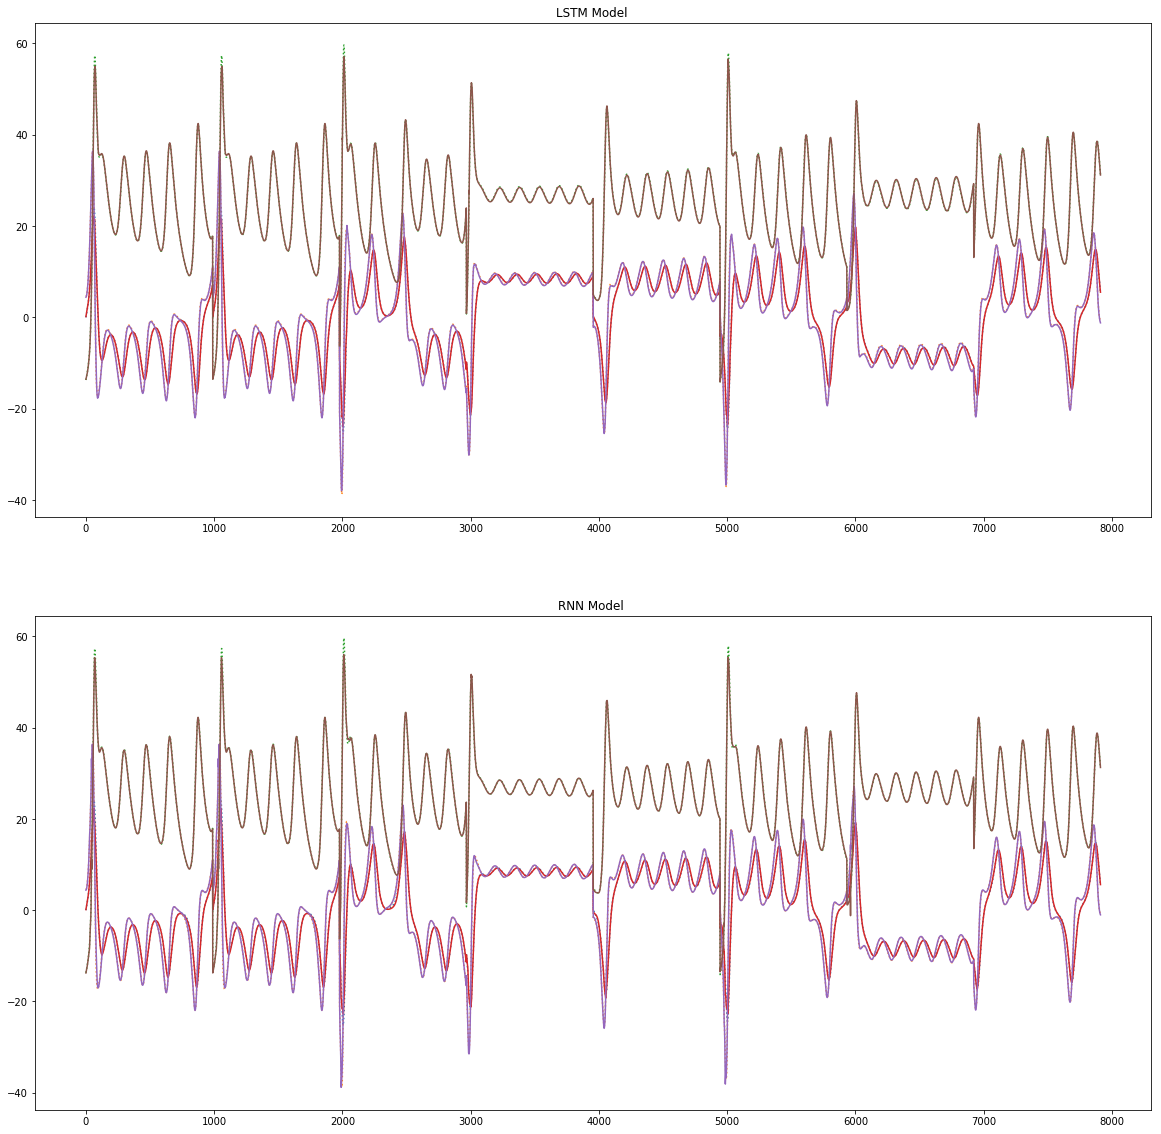

In [30]:
from matplotlib import pyplot as plt
# plot baseline and predictions
print("Graphing LSTM and RNN on Training data ")
plt.figure(figsize=(20,20))
plt.subplot(2 ,1, 1)
plt.title("LSTM Model ")
plt.plot(y_train, linestyle=':')
plt.plot(trainPredict)

plt.subplot(2, 1, 2)
plt.title("RNN Model ")
plt.plot(y_train, linestyle=':')
plt.plot(RNNtrainPredict)

plt.show()

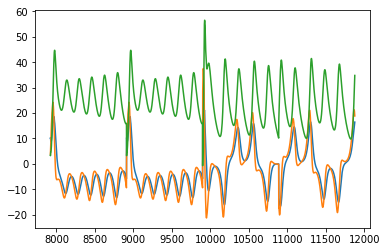

In [31]:
list = np.arange(len(trainPredict)+10,len(trainPredict)+len(testPredict)+10)
plt.plot(list,testPredict) # plot baseline and predictions

In [32]:
print(trainPredict-y_train)

[[ 0.13481953 -0.12533375  0.16061338]
 [ 0.15186426 -0.0974724   0.11794839]
 [ 0.16766667 -0.069979    0.0871733 ]
 ...
 [-0.00347775 -0.2344836  -0.1192812 ]
 [-0.00595753 -0.23850849 -0.1174697 ]
 [-0.00759146 -0.24183371 -0.11565586]]


## Calculate difference between prediction and actual

Graphing LSTM true test output against predicted output 


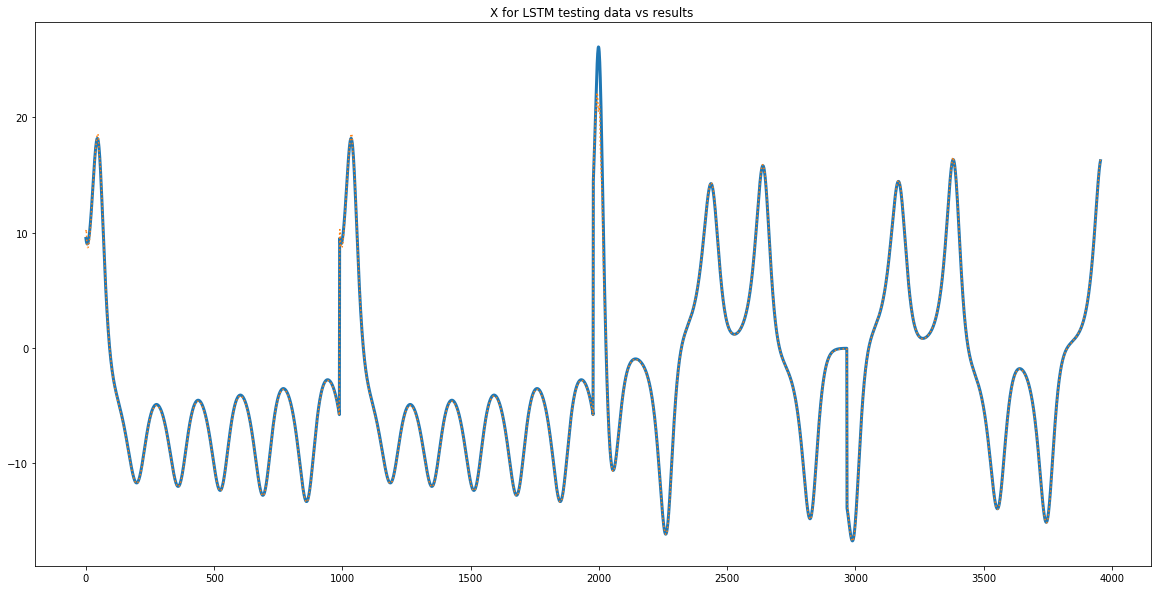

In [33]:
print("Graphing LSTM true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("X for LSTM testing data vs results ")
plt.plot(y_test[:,0:1], linewidth=3.0 )
plt.plot(testPredict[:,0:1], linestyle=':' )
plt.show()

Graphing RNN true test output against predicted output 


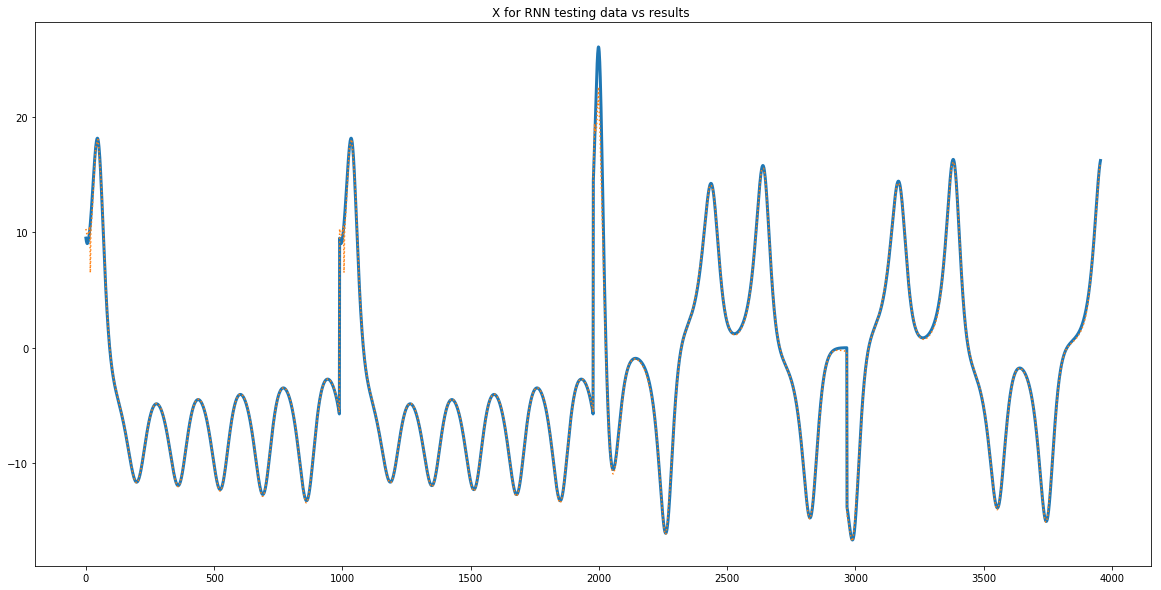

In [34]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("X for RNN testing data vs results ")
plt.plot(y_test[:,0:1], linewidth=3.0 )
plt.plot(RNNtestPredict[:,0:1], linestyle=':' )
plt.show()

Graphing true test output against predicted output 


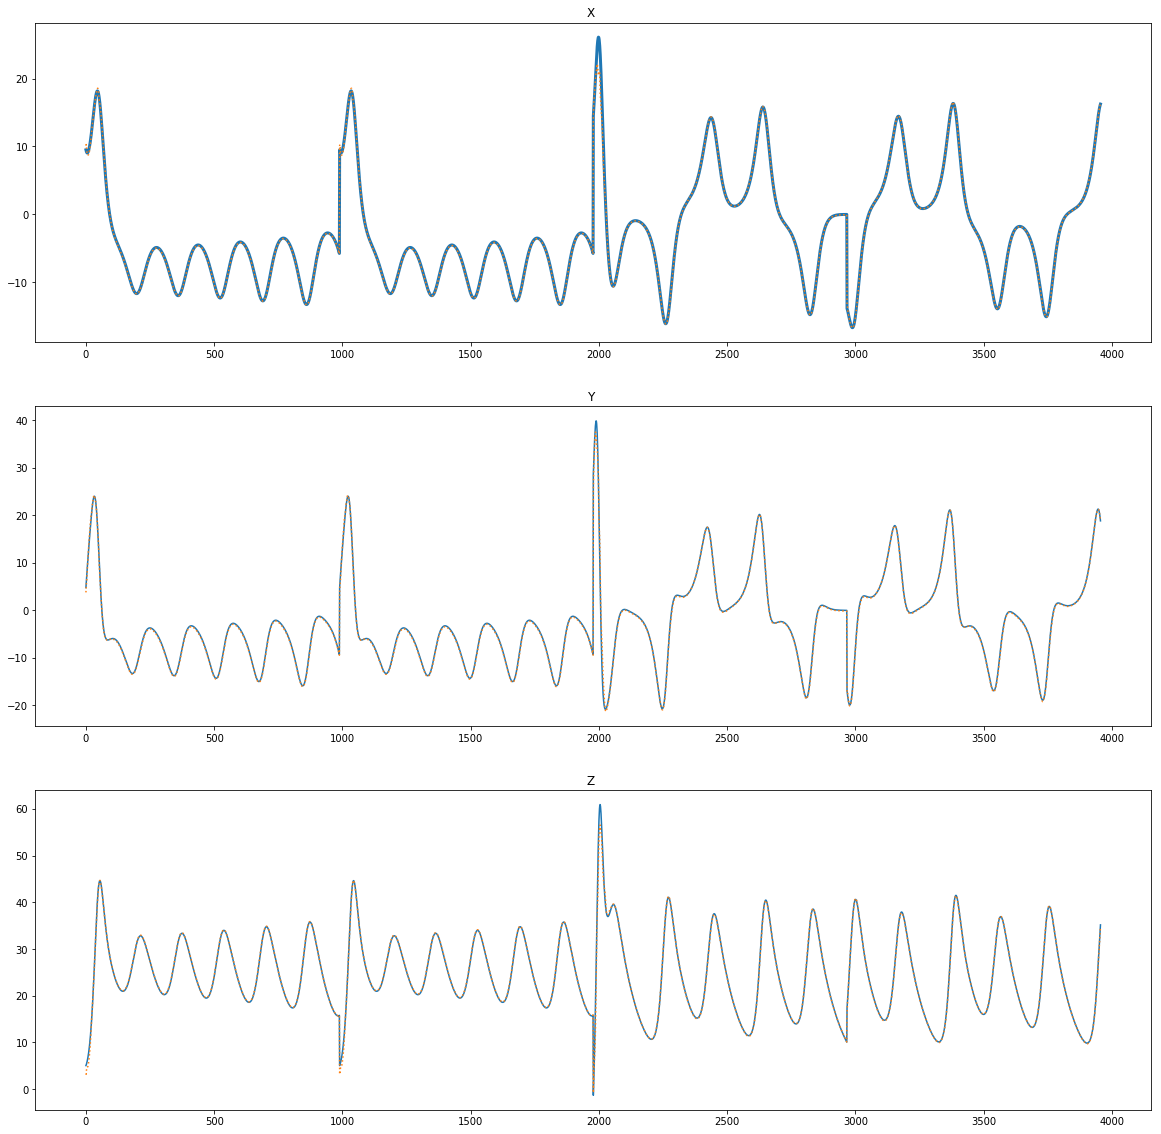

In [35]:
print("Graphing true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(y_test[:,0:1], linewidth=3.0 )
plt.plot(testPredict[:,0:1], linestyle=':' )

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(y_test[:,1:2] )
plt.plot(testPredict[:,1:2], linestyle=':' )

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(y_test[:,2:3] )
plt.plot(testPredict[:,2:3], linestyle=':' )
plt.show()

In [36]:
print (y_test.shape)
print (y_test)

(3956, 3)
[[ 9.50743691  4.78218811  5.05422845]
 [ 9.33868889  5.62420225  5.19580543]
 [ 9.20915422  6.44350491  5.36346359]
 ...
 [15.98936717 19.81395459 33.41044267]
 [16.1306741  19.35847338 34.30881879]
 [16.2473985  18.84463462 35.17646154]]


In [37]:
y_test_win = [[x] for x in y_test]
y_test_win = np.array(y_test_win)
print (y_test_win.shape)
print (y_test_win)

(3956, 1, 3)
[[[ 9.50743691  4.78218811  5.05422845]]

 [[ 9.33868889  5.62420225  5.19580543]]

 [[ 9.20915422  6.44350491  5.36346359]]

 ...

 [[15.98936717 19.81395459 33.41044267]]

 [[16.1306741  19.35847338 34.30881879]]

 [[16.2473985  18.84463462 35.17646154]]]


In [38]:
print (testPredict.shape)
print (testPredict)

(3956, 3)
[[10.114931   3.775552   3.2779865]
 [10.276788   4.767396   3.197064 ]
 [10.055446   5.6372504  4.033738 ]
 ...
 [16.077267  19.844807  32.921707 ]
 [16.252708  19.37682   33.882656 ]
 [16.406593  18.826029  34.782463 ]]


In [39]:
test_diff = testPredict-y_test_win
print(testPredict-y_test_win)

[[[ 6.07494200e-01 -1.00663608e+00 -1.77624193e+00]
  [ 7.69350851e-01 -1.47921369e-02 -1.85716453e+00]
  [ 5.48008764e-01  8.55062313e-01 -1.02049032e+00]
  ...
  [ 6.56982979e+00  1.50626186e+01  2.78674787e+01]
  [ 6.74527153e+00  1.45946315e+01  2.88284276e+01]
  [ 6.89915642e+00  1.40438407e+01  2.97282346e+01]]

 [[ 7.76242215e-01 -1.84865021e+00 -1.91781890e+00]
  [ 9.38098866e-01 -8.56806272e-01 -1.99874150e+00]
  [ 7.16756779e-01  1.30481779e-02 -1.16206729e+00]
  ...
  [ 6.73857780e+00  1.42206044e+01  2.77259017e+01]
  [ 6.91401954e+00  1.37526174e+01  2.86868507e+01]
  [ 7.06790443e+00  1.32018266e+01  2.95866576e+01]]

 [[ 9.05776887e-01 -2.66795287e+00 -2.08547707e+00]
  [ 1.06763354e+00 -1.67610894e+00 -2.16639967e+00]
  [ 8.46291452e-01 -8.06254485e-01 -1.32972546e+00]
  ...
  [ 6.86811247e+00  1.34013018e+01  2.75582436e+01]
  [ 7.04355422e+00  1.29333147e+01  2.85191925e+01]
  [ 7.19743910e+00  1.23825239e+01  2.94189995e+01]]

 ...

 [[-5.87443606e+00 -1.60384026e+01

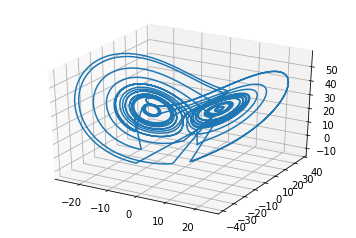

In [40]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(y_train[:,0],y_train[:,1],y_train[:,2])
plt.show()

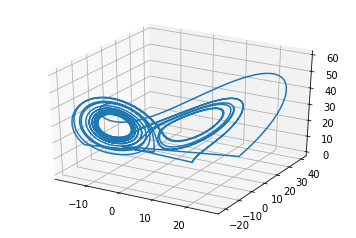

In [41]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(y_test[:,0],y_test[:,1],y_test[:,2])
plt.show()

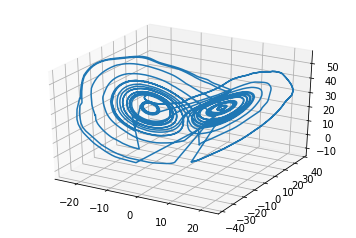

In [42]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(trainPredict[:,0],trainPredict[:,1],trainPredict[:,2])
plt.show()

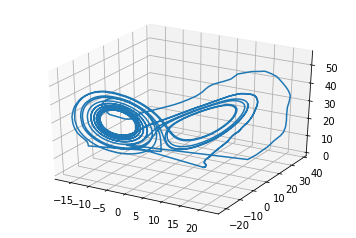

In [43]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(testPredict[:,0],testPredict[:,1],testPredict[:,2])
plt.show()

## Testing with single starting point - predicting 1 ahead

In [44]:
SEQUENCE_SIZE = 10
single_t, single_lor = solve_lorenz(N=1) #try 10 random starting point initially, chnage to 100 later
single_x, single_y  = to_sequences_ray(SEQUENCE_SIZE,single_lor)
singlePredict = model.predict(single_x)
RNNsinglePredict = RNNmodel.predict(single_x)
print ("Shape of data: ", single_lor.shape)
print ("Shape of windowed data: ", single_x.shape)

Shape of data:  (1, 1000, 3)
Shape of windowed data:  (1978, 10, 3)


Graphing LSTM true test output against predicted output 


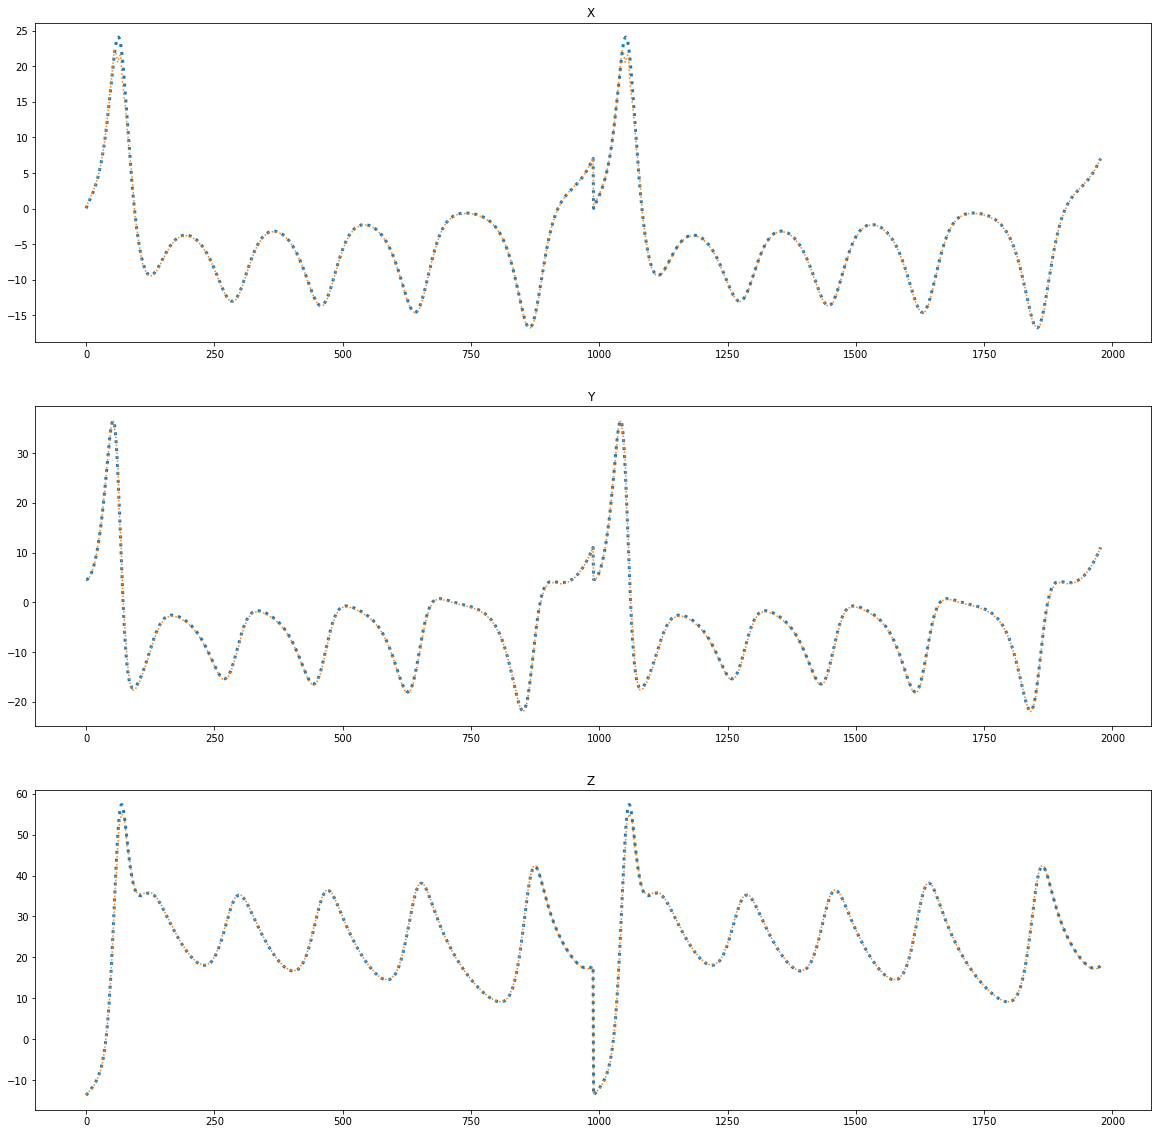

In [45]:
print("Graphing LSTM true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=3.0, linestyle=':' )
plt.plot(singlePredict[:,0:1], linestyle=':' )

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(single_y[:,1:2], linewidth=3.0, linestyle=':'  )
plt.plot(singlePredict[:,1:2], linestyle=':' )

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(single_y[:,2:3], linewidth=3.0, linestyle=':'  )
plt.plot(singlePredict[:,2:3], linestyle=':' )
plt.show()

Graphing RNN true test output against predicted output 


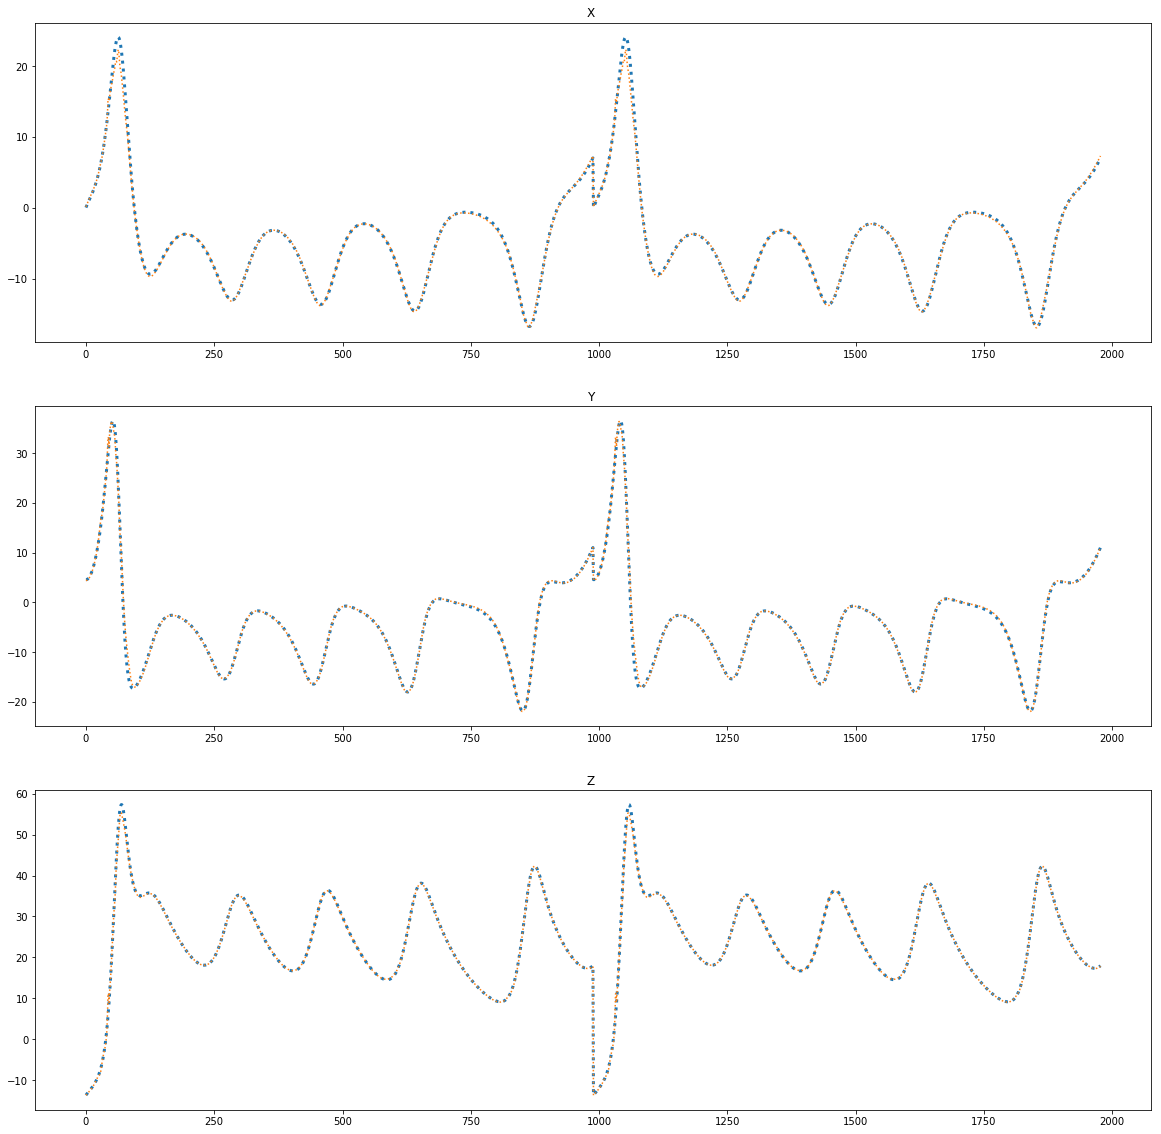

In [46]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=3.0, linestyle=':' )
plt.plot(RNNsinglePredict[:,0:1], linestyle=':' )

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(single_y[:,1:2], linewidth=3.0, linestyle=':' )
plt.plot(RNNsinglePredict[:,1:2], linestyle=':' )

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(single_y[:,2:3], linewidth=3.0, linestyle=':' )
plt.plot(RNNsinglePredict[:,2:3], linestyle=':' )
plt.show()

In [47]:
print ("Calculating LSTM error with single time series")
print("Shape of output: ",single_y.shape)
err3D = single_y - singlePredict
err1D = (single_y - singlePredict)**2
err1D = err1D.sum(axis=-1)
err1D = np.sqrt(err1D)
aveErr = np.average(err1D)
print("Average error = ", aveErr)

Calculating LSTM error with single time series
Shape of output:  (1978, 3)
Average error =  0.33311797758636613


In [48]:
print ("Calculating RNN error with single time series")
print("Shape of output: ",single_y.shape)
RNNerr3D = single_y - RNNsinglePredict
RNNerr1D = (single_y - RNNsinglePredict)**2
RNNerr1D = RNNerr1D.sum(axis=-1)
RNNerr1D = np.sqrt(RNNerr1D)
RNNaveErr = np.average(RNNerr1D)
print("Average error = ", RNNaveErr)

Calculating RNN error with single time series
Shape of output:  (1978, 3)
Average error =  0.37864890075599705


Graphing true test output against predicted output 


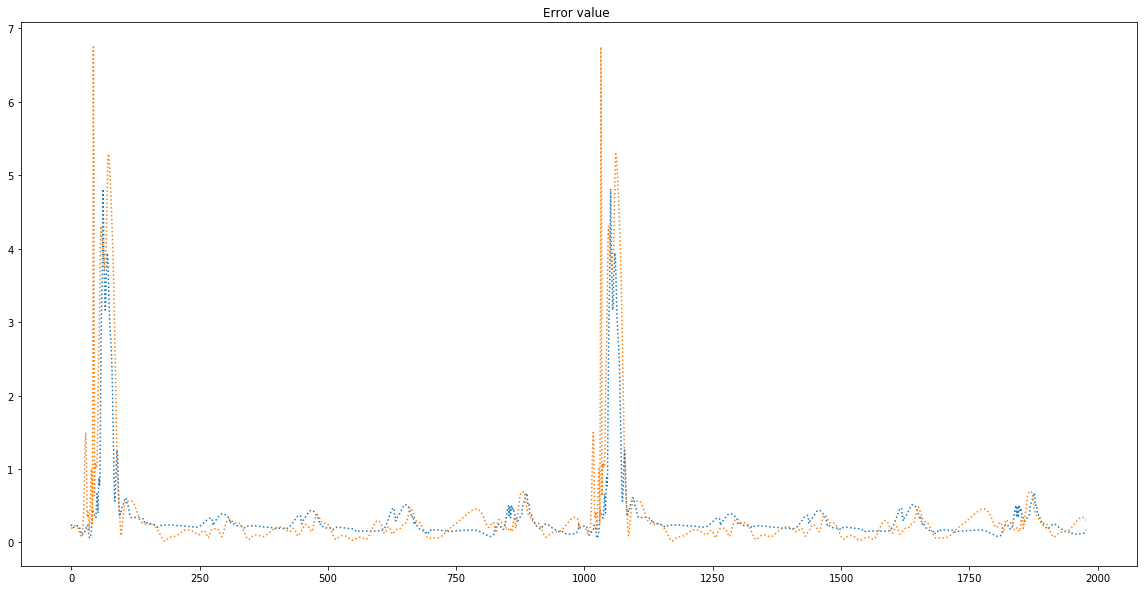

In [49]:
print("Graphing true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("Error value ")
plt.plot(err1D, linestyle=':' )
plt.plot(RNNerr1D, linestyle=':' )
plt.show()